**Created by Sohail**

**📊 U.S. Patent Phrase Detailed - EDA 📊**

  # <center> 📊 U.S Patent Phrase DETAILED- EDA 📊 </center>
## <center>If you find this notebook useful, support with an upvote👍</center>

# Table of Contents

<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. EDA](#3)
    - [3.1 Train Data](#3.1)
    - [3.2 Test Data](#3.2)
    - [3.3 Column Data](#3.3)
        - [3.3.1 ID](#3.3.1)
        - [3.3.2 Anchor](#3.3.2)
            - [3.3.2.1 Anchor Top 30 anchor text counts](#3.3.2.1)
            - [3.3.2.2 Anchor wordcloud](#3.3.2.2)
            - [3.3.2.3 Anchor text statistics](#3.3.2.3)
        - [3.3.3 Target](#3.3.3)
            - [3.3.3.1 Target Top 30 text counts](#3.3.3.1)
            - [3.3.3.2 Target wordcloud](#3.3.3.2)
            - [3.3.3.3 Target text statistics](#3.3.3.3)
        - [3.3.4 Context](#3.3.4)
            - [3.3.4.1 Split context column](#3.3.4.1)
            - [3.3.4.2 Countplot section and class](#3.3.4.2)
            - [3.3.4.3 Dictionary for section names](#3.3.4.3)
            - [3.3.4.4 plot anchor vs section names](#3.3.4.4)
        - [3.3.5 Score](#3.3.5)
            - [3.3.5.1 Disctribution of scores across the sections](#3.3.5.1)
            - [3.3.5.2 Breakdown of scores for each section](#3.3.5.2)
            - [3.3.5.3 Mean of scores by each class](#3.3.5.3)
            - [3.3.5.4 Plotting max and minumum score for each section](#3.3.5.4)
- [4. cpc-codes_description](#4)
            

<a id = "1"></a>
# Introduction

### <center>[U.S. Patent Phrase to Phrase Matching](https://www.kaggle.com/c/us-patent-phrase-to-phrase-matching/overview)</center>

  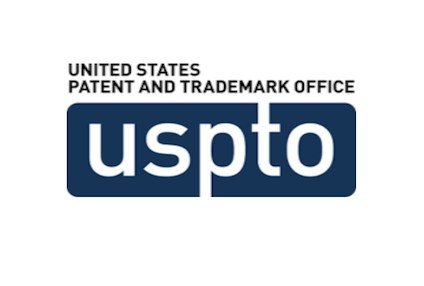

In this competition we are training our models to find the similarity between anchor word and the target text.

Lets see the use cases of this or why this is useful

> **When patent office recieves any document for patent filing, searching whether the patent is already filed on the same concept can be a tidous process, hence we find the similarities and if the sematics exactly match or the score is high then the probable chances of patent is already filed is also high**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

# <center>IMPORTS</center> 
<a id="2"></a>

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from wordcloud import WordCloud , STOPWORDS

In [ ]:
df_train = pd.read_csv('/kaggle/input/us-patent-phrase-to-phrase-matching/train.csv')
df_test = pd.read_csv('/kaggle/input/us-patent-phrase-to-phrase-matching/test.csv')
df_submission = pd.read_csv('/kaggle/input/us-patent-phrase-to-phrase-matching/sample_submission.csv')

warnings.filterwarnings('ignore')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

# <center>EDA</center> 
<a id="3"></a>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Train Data:</u></b><br>
 
* <i> There are total of <b><u>5</u></b> columns and <b><u>36473</u></b> rows in <b><u>train</u></b> data.</i><br>
* <i> Train data contain <b><u>0</u></b>  missing values.</i><br>
* <i> <b><u>733</u></b> unique anchor texts and <b><u>29340</u></b> target contexts are present.</i><br>
* <i> <b><u>106</u></b> unique contexts <b><u>5</u></b> scoring ranges are present.</i><br>
</div>

<a id="3.1"></a>
# Train data

**Columns**

* **id** - a unique identifier for a pair of phrases
* **anchor** - the first phrase
* **target** - the second phrase
* **context** - the CPC classification (version 2021.05), which indicates the subject within which the **similarity** is to be scored
* **score** - the similarity. This is sourced from a combination of one or more manual expert ratings.

### Quick view of Train Data

In [ ]:
print(f'\033[92mNumber of rows in train data: {df_train.shape[0]}')
print(f'\033[94mNumber of columns in train data: {df_train.shape[1]}')
print(f'\033[91mNumber of values in train data: {df_train.count().sum()}')
print(f'\033[91mNumber missing values in train data: {sum(df_train.isna().sum())}')
df_train.head()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

# Test data
<a id="3.2"></a>

### Quick view of Test Data

In [ ]:
print(f'\033[92mNumber of rows in test data: {df_test.shape[0]}')
print(f'\033[94mNumber of columns in test data: {df_test.shape[1]}')
print(f'\033[91mNumber of values in train data: {df_test.count().sum()}')
print(f'\033[91mNo of rows with missing values  in test data: {sum(df_test.isna().sum())}')
df_test.head()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

# Column Data
<a id="3.3"></a>

# Id column
<a id="3.3.1"></a>

**The is no much explaination for this, as it is the unique id of each row**
* **36473** unique values
* **no null** values in the column

In [ ]:
df_train.id

In [ ]:
df_train.id.isnull().sum()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

## Anchor column
<a id="3.3.2"></a>

It is the source column and is called the **"first phrase"** in dataset which is used to check the similarity with the target column.

* It has **733 unique** values
* There are **0 null values** in this column
* Most of the words in anchor lie between **10 to 20 charecters**

In [ ]:
df_train['anchor'].nunique()

In [ ]:
df_train.anchor.isnull().sum()

### Anchor Top 30 counts 
<a id="3.3.2.1"></a>

In [ ]:
# Top 30 anchor phrases counts

fig, ax = plt.subplots(figsize = (12,8))

sns.barplot(x=df_train['anchor'].value_counts()[:30].index, y=df_train['anchor'].value_counts()[:30], ax=ax)
plt.xticks(rotation = 'vertical')
plt.show()

### Wordcloud for Anchor
<a id="3.3.2.2"></a>

In [ ]:
anchor_values = df_train[df_train.anchor.notnull()].anchor.values
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, 
                      height = 800,
                      background_color ='white',
                      min_font_size = 10,
                      stopwords = stopwords,).generate(' '.join(anchor_values)) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

### Text Statistics
<a id="3.3.2.3"></a>

In [ ]:
df_train.anchor.str.len().hist()

Most of the words in anchor lie between **10 to 20 charecters**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

# Target column
<a id="3.3.3"></a>

It is the target column and is called the **"Second phrase"** in dataset which is used to check the similarity with the anchor column.

* It has **29340 unique** values
* There are **0 null values** in this column
* Most of the words are in between **0-40 charecters** 

In [ ]:
print(f"Number of unique values in target column: {df_train.target.nunique()}")

In [ ]:
df_train.target.isnull().sum()

### Target top 30 counts
<a id = "3.3.3.1"></a>

In [ ]:
fig,ax = plt.subplots(figsize=(12,9))
sns.barplot(x=df_train['target'].value_counts()[:30].index, y=df_train['target'].value_counts()[:30], ax=ax)
plt.xticks(rotation = 'vertical')
plt.show()

### Target WordCloud
<a id = "3.3.3.2"></a>

In [ ]:
anchor_values = df_train[df_train.target.notnull()].anchor.values
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, 
                      height = 800,
                      background_color ='white',
                      min_font_size = 10,
                      stopwords = stopwords,).generate(' '.join(anchor_values)) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

### Text Statistics
<a id = "3.3.3.3"></a>

In [ ]:
df_train.target.str.len().hist()

Most of the words are in between **0-40 charecters** 

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

# Context Column
<a id = "3.3.4"></a>

Source: https://en.wikipedia.org/wiki/Cooperative_Patent_Classification

The first letter is the **"section symbol"** consisting of a letter from **"A"** ("Human Necessities") to **"H"** ("Electricity") or **"Y"** for emerging cross-sectional technologies. This is followed by a **two-digit number** to give a "class symbol" (**"A01"** represents "Agriculture; forestry; animal husbandry; trapping; fishing").

* **A**: Human Necessities
* **B**: Operations and Transport
* **C**: Chemistry and Metallurgy
* **D**: Textiles
* **E**: Fixed Constructions
* **F**: Mechanical Engineering
* **G**: Physics
* **H**: Electricity
* **Y**: Emerging Cross-Sectional Technologies


* **Hierarchy**
    * Section (one letter A to H and also Y)
        * Class (two digits)

**Example "A45"**

* Section A
    * Class 45


In [ ]:
print(f"Number of unique values in CONTEXT column {df_train.context.nunique()}")

### Split context column
<a id = "3.3.4.1"></a>

**Lets split the Section and class to two different columns** 

In [ ]:
df_train['section'] = df_train['context'].astype(str).str[0]
df_train['class'] = df_train['context'].astype(str).str[1:]

In [ ]:
df_train.head()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### Countplot section and class
<a id = "3.3.4.2"></a>

In [ ]:
fig,ax = plt.subplots(2,1, figsize = (12,8))

sns.countplot(data = df_train, x = df_train.section, palette = 'pastel', ax=ax[0])

sns.countplot(data = df_train, x = df_train['class'], palette = 'pastel', ax=ax[1])

plt.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

* **Section 'B'** has highest observations wheras **Section 'D'** has least number of observations
**Class 01, 02, 03, 04**  combined has most number of observations

### Dictionary for section names
<a id = "3.3.4.3"></a>

Let's **make a dictionary** of sections and replace them by real section names


In [ ]:
patent_sections = {"A" : "A - Human Necessities", 
      "B" : "B - Operations and Transport",
      "C" : "C - Chemistry and Metallurgy",
      "D" : "D - Textiles",
      "E" : "E - Fixed Constructions",
      "F" : "F- Mechanical Engineering",
      "G" : "G - Physics",
      "H" : "H - Electricity",
      "Y" : "Y - Emerging Cross-Sectional Technologies"}

In [ ]:
df_train['section_names'] = df_train['section'].map(patent_sections)

In [ ]:
df_train.groupby('anchor').section_names.count()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### plot anchor vs section names
<a id = "3.3.4.4"></a>

**Let's plot some anchor words to section names** 

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
df_train.groupby('anchor').section_names.value_counts()[:19].unstack(0).plot(kind = 'bar', ax=ax)

**How to depict this graph?**

**Section A** contains **more than 20 observations** of the words "**abatement, activating position and accept information.**

**Section B** contains **more than 20 observations** of the words "**abatement,abnormal position and more than 80 observations of acid absorption.**

and so on.....


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

# Score Column
<a id = "3.3.5"></a>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Score Column:</u></b><br>
 
* <i>1.0 - Very close match. This is typically an exact match except possibly for differences in conjugation, quantity (e.g. singular vs. plural), and addition or removal of stopwords (e.g. “the”, “and”, “or”).</i><br>
    
* <i>0.75 - Close synonym, e.g. “mobile phone” vs. “cellphone”. This also includes abbreviations, e.g. "TCP" -> "transmission control protocol".</i><br>
    
* <i>0.5 - Synonyms which don’t have the same meaning (same function, same properties). This includes broad-narrow (hyponym) and narrow-broad (hypernym) matches.</i><br>
    
* <i>0.25 - Somewhat related, e.g. the two phrases are in the same high level domain but are not synonyms. This also includes antonyms.</i><br>
    
* <i>0.0 - Unrelated.</i><br>
    

### Disctribution of scores across the sections
<a id ="3.3.5.1"></a>

In [ ]:
sns.countplot(data = df_train, x = df_train.score, palette = 'pastel')

**0.5 and 0.25** have the maximun number of observations

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### Breakdown of scores for each section
<a id = "3.3.5.2"></a>

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
df_train.groupby('score').section.value_counts().plot(kind = 'bar', ax=ax)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### Mean of scores by each class
<a id = "3.3.5.3"></a>

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
df_train.groupby('section')['score'].mean().plot(kind = 'bar', ax=ax)

Most of the sections have a mean score of **around 0.35**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### Plotting max and minumum score for each section
<a id= "3.3.5.4"></a>

Let's plot which sections have **maximum number of score '0' and '1'**

In [ ]:
df_temp = df_train[df_train.score == 0]
df_temp_1 = df_train[df_train.score == 1]
fig,ax = plt.subplots(2,1,figsize=(12,8))
df_temp.groupby('section')['score'].count().plot(kind = 'bar', ax=ax[0])
df_temp_1.groupby('section')['score'].count().plot(kind = 'bar', ax=ax[1])

* The observations with **number of 0's is more than observations with 1's**
* **Section B** has the highest number of 0 and 1
* **Section A and C** have more 0's than 1 in their observations
* The percentage of 0's is highest for **H section after section B**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

# cpc-codes_description
<a id = "4"></a>

Additional cpc-codes data from kaggle : https://www.kaggle.com/datasets/xhlulu/cpc-codes

**From these codes we are going to take only titles for each code and append to our training dataset**

In [ ]:
df_cpc_titles = pd.read_csv('/kaggle/input/cpc-codes/titles.csv')

In [ ]:
df_cpc_titles

In [ ]:
df_train['context_title'] = df_train['context'].map(df_cpc_titles.set_index('code')['title']).str.lower()

In [ ]:
df_train.head()

**Top 20 counts of context_title**

In [ ]:
fig,ax = plt.subplots(figsize = (6,12))
df_train.context_title.value_counts()[:20].sort_values().plot(kind = 'barh', ax=ax)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>